In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic scaling

In [2]:
d = pd.read_csv('../tables/d.csv', parse_dates=['Time_Start', 'Time_Stop', 'Time_Mid'])
d['tot'] = d[['Org_AMS_STP', 'SO4_AMS_STP', 'NO3_AMS_STP', 'NH4_AMS_STP', 'Chl_AMS_STP']].sum(axis=1)
d_no_na = d.dropna(subset=['RI']).reset_index(drop=True)
ind = list(range(0, len(d_no_na)))
d_sp = d_no_na[d_no_na['Time_Mid']<'2024-07-01'].reset_index(drop=True)
d_su = d_no_na[d_no_na['Time_Mid']>'2024-07-01'].reset_index(drop=True)

In [3]:
# Run above code for remaining cells to function

Text(0, 0.5, 'RI')

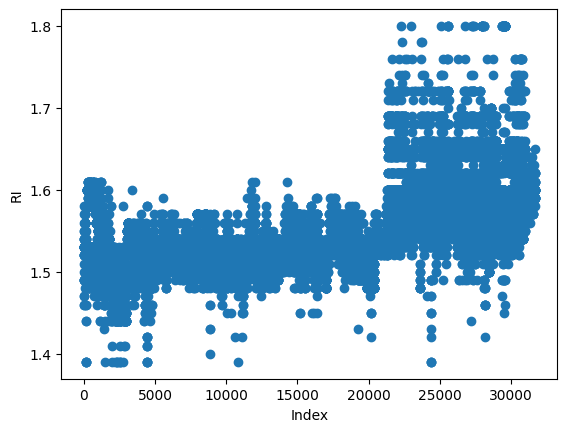

In [4]:
fig, ax = plt.subplots()
ax.scatter(ind, d['RI'], label='Time_Mid')
ax.set_xlabel('Index')
ax.set_ylabel('RI')

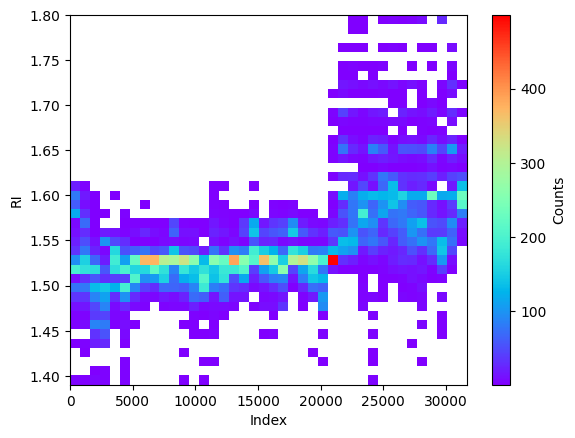

In [5]:
fig, ax = plt.subplots()
# Create a 2D histogram
h = ax.hist2d(ind, d['RI'], bins=(40, 40), cmap='rainbow', cmin=1)
ax.set_xlabel('Index')
ax.set_ylabel('RI')
plt.colorbar(h[3], ax=ax, label='Counts')  # Add a colorbar for density

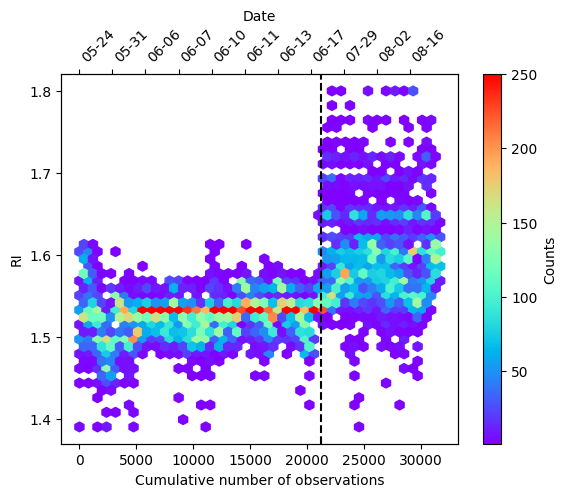

In [6]:
fig, ax = plt.subplots()
# Create a hexbin plot
hb = ax.hexbin(ind, d['RI'], gridsize=40, cmap='rainbow', mincnt=1, vmax=250)
ax.set_xlabel('Cumulative number of observations')
ax.set_ylabel('RI')
ax.axvline(21227, c='black', alpha=1, ls='--')
# Set the positions and labels for the top axis
index_ticks = np.arange(0, ind[-1], 2900)  # Every 5000 index points
date_labels = d_no_na['Time_Mid'].iloc[index_ticks].dt.strftime('%m-%d')  # Format dates
ax2 = ax.twiny()
ax2.set_xticks(index_ticks)
ax2.set_xticklabels(date_labels, rotation=45, ha='left')  # Rotate labels for better readability
ax2.set_xlim(ax.get_xlim())  # Align the top axis limits with the bottom axis
ax2.set_xlabel('Date')
plt.colorbar(hb, ax=ax, label='Counts')  # Add a colorbar for density
plt.savefig('../figures/RI_hexbin.png', dpi=300, bbox_inches='tight')

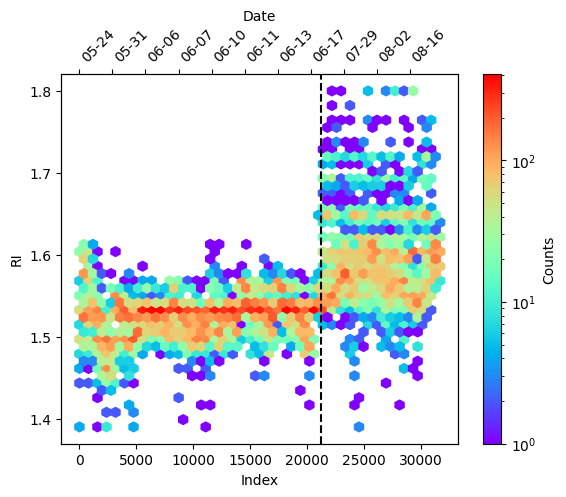

In [7]:
fig, ax = plt.subplots()
# Create a hexbin plot
hb = ax.hexbin(ind, d['RI'], gridsize=40, cmap='rainbow', bins='log')
ax.set_xlabel('Index')
ax.set_ylabel('RI')
ax.axvline(21227, c='black', alpha=1, ls='--')
# Set the positions and labels for the top axis
index_ticks = np.arange(0, ind[-1], 2900)  # Every 5000 index points
date_labels = d_no_na['Time_Mid'].iloc[index_ticks].dt.strftime('%m-%d')  # Format dates
ax2 = ax.twiny()
ax2.set_xticks(index_ticks)
ax2.set_xticklabels(date_labels, rotation=45, ha='left')  # Rotate labels for better readability
ax2.set_xlim(ax.get_xlim())  # Align the top axis limits with the bottom axis
ax2.set_xlabel('Date')
plt.colorbar(hb, ax=ax, label='Counts')  # Add a colorbar for density
plt.savefig('../figures/RI_hexbin_log.png', dpi=300, bbox_inches='tight')

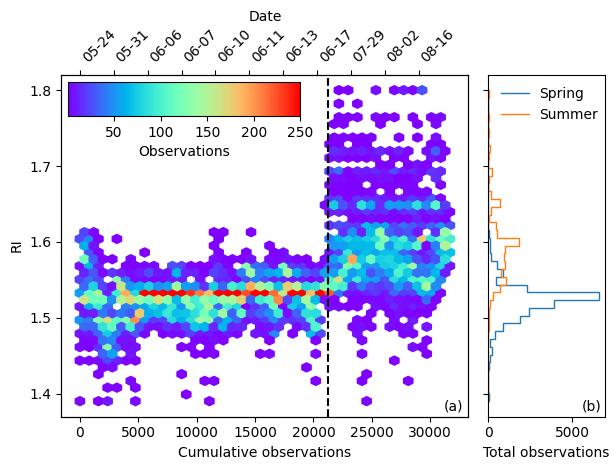

In [8]:
fig, axes = plt.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [3.5, 1]})
# Create a hexbin plot
ax = axes[0]
hb = ax.hexbin(ind, d['RI'], gridsize=40, cmap='rainbow', mincnt=1, vmax=250)
ax.set_xlabel('Cumulative observations')
ax.set_ylabel('RI')
ax.axvline(21227, c='black', alpha=1, ls='--')
# Set the positions and labels for the top axis
index_ticks = np.arange(0, ind[-1], 2900)  # Every 5000 index points
date_labels = d_no_na['Time_Mid'].iloc[index_ticks].dt.strftime('%m-%d')  # Format dates
ax2 = ax.twiny()
ax2.set_xticks(index_ticks)
ax2.set_xticklabels(date_labels, rotation=45, ha='left')  # Rotate labels for better readability
ax2.set_xlim(ax.get_xlim())  # Align the top axis limits with the bottom axis
ax2.set_xlabel('Date')
# Add text to the top-left corner
ax.text(0.94, 0.05, '(a)', transform=ax.transAxes, verticalalignment='top')

ax = axes[1]
ax.text(0.80, 0.05, '(b)', transform=ax.transAxes, verticalalignment='top')
# Assuming d_sp['RI'] and d_su['RI'] are your datasets
combined_data = np.concatenate([d_sp['RI'], d_su['RI']])
bin_edges = np.linspace(min(combined_data), max(combined_data), num=41)  # 40 bins

# Plot the first histogram with the defined bin edges
counts, _ = np.histogram(d_sp['RI'], bins=bin_edges)
ax.stairs(counts, bin_edges, label='Spring', orientation='horizontal')

# Plot the second histogram with the same bin edges
counts, _ = np.histogram(d_su['RI'], bins=bin_edges)
ax.stairs(counts, bin_edges, label='Summer', orientation='horizontal')
ax.legend(frameon=False)
ax.set_xlabel('Total observations')
#fig.subplots_adjust(hspace =-1.00)
plt.tight_layout()

cbaxes = inset_axes(axes[0], width="57%", height="10%", loc='upper left') 
cbar = plt.colorbar(hb, cax=cbaxes, label='Observations', location='top',pad=-.05)  # Add a colorbar for density
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')
plt.savefig('../figures/RI_hexbin_mult.png', dpi=300, bbox_inches='tight')

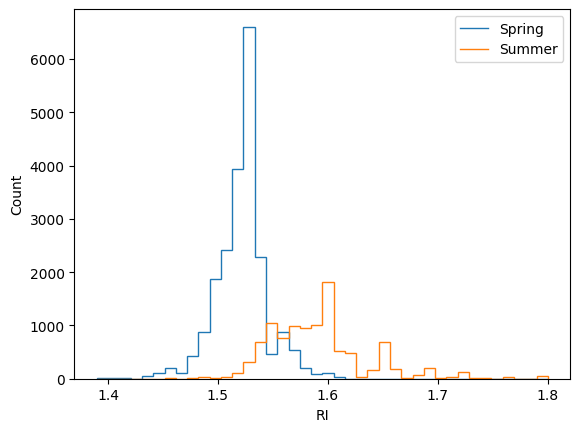

In [9]:
# Assuming d_sp['RI'] and d_su['RI'] are your datasets
combined_data = np.concatenate([d_sp['RI'], d_su['RI']])
bin_edges = np.linspace(min(combined_data), max(combined_data), num=41)  # 40 bins

fig, ax = plt.subplots()

# Plot the first histogram with the defined bin edges
counts, _ = np.histogram(d_sp['RI'], bins=bin_edges)
ax.stairs(counts, bin_edges, label='Spring')

# Plot the second histogram with the same bin edges
counts, _ = np.histogram(d_su['RI'], bins=bin_edges)
ax.stairs(counts, bin_edges, label='Summer')

ax.set_xlabel('RI')
ax.set_ylabel('Count')
ax.legend()
plt.savefig('../figures/RI_stairs.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Count')

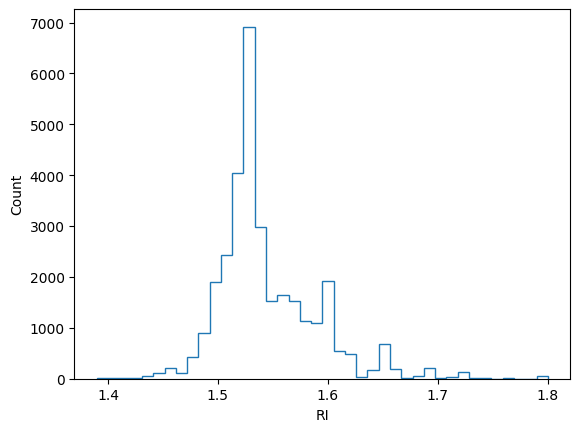

In [10]:
fig, ax = plt.subplots()
counts, bins = np.histogram(d['RI'], bins=40)
ax.stairs(counts, bins)
ax.set_xlabel('RI')
ax.set_ylabel('Count')

In [11]:
(d['Org_AMS_STP']/d['tot']).describe()

count    1.659300e+04
mean     1.250683e+12
std      1.611053e+14
min     -4.820000e+02
25%      3.378889e-01
50%      5.971960e-01
75%      7.966423e-01
max      2.075259e+16
dtype: float64

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1944/2414257081.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


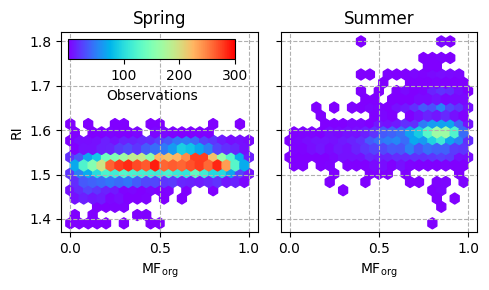

In [12]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(5,3))
ds = [d_sp, d_su]


for i, ax in enumerate(axes):
    di = ds[i]
    di = di[(di['Org_AMS_STP']/di['tot']<1) & (di['Org_AMS_STP']/di['tot']>0)]
    hb = ax.hexbin(di['Org_AMS_STP']/di['tot'], di['RI'], gridsize=20, cmap='rainbow', mincnt=1, vmin=1, vmax=300, extent=[0, 1, d['RI'].min(), d['RI'].max()])
    ax.set_xlabel(r'MF$_{\rm org}$')
    ax.set_title(['Spring', 'Summer'][i])
    # Add grid lines
    ax.grid(True, linestyle='--', alpha=1)

cbaxes = inset_axes(axes[0], width="85%", height="10%", loc='upper left') 
cbar = plt.colorbar(hb, cax=cbaxes, label='Observations', location='top',pad=-.05)  # Add a colorbar for density
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')

axes[0].set_ylabel('RI')
fig.tight_layout()
fig.savefig('../figures/RI_MF_org_hexbin.png', dpi=600, bbox_inches='tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1944/381709316.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


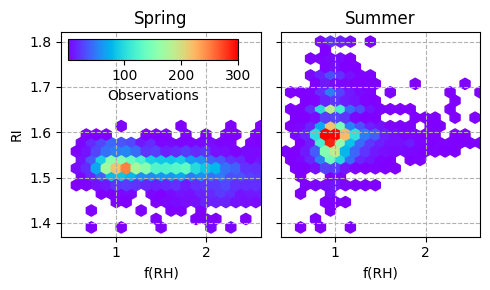

In [13]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(5,3))
ds = [d_sp, d_su]


for i, ax in enumerate(axes):
    di = ds[i]
    #di = di[(di['Org_AMS_STP']/di['tot']<1) & (di['Org_AMS_STP']/di['tot']>0)]
    hb = ax.hexbin(di['fRH550_RH20to80'], di['RI'], gridsize=20, cmap='rainbow', mincnt=1, vmin=1, vmax=300, extent=[.4, 2.6, d['RI'].min(), d['RI'].max()])
    ax.set_xlabel(r'f(RH)')
    ax.set_title(['Spring', 'Summer'][i])
    # Add grid lines
    ax.grid(True, linestyle='--', alpha=1)

cbaxes = inset_axes(axes[0], width="85%", height="10%", loc='upper left') 
cbar = plt.colorbar(hb, cax=cbaxes, label='Observations', location='top',pad=-.05)  # Add a colorbar for density
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')
axes[0].set_xlim([.4,2.6])
axes[0].set_ylabel('RI')
fig.tight_layout()
fig.savefig('../figures/RI_fRH_hexbin.png', dpi=600, bbox_inches='tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1944/1521293678.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


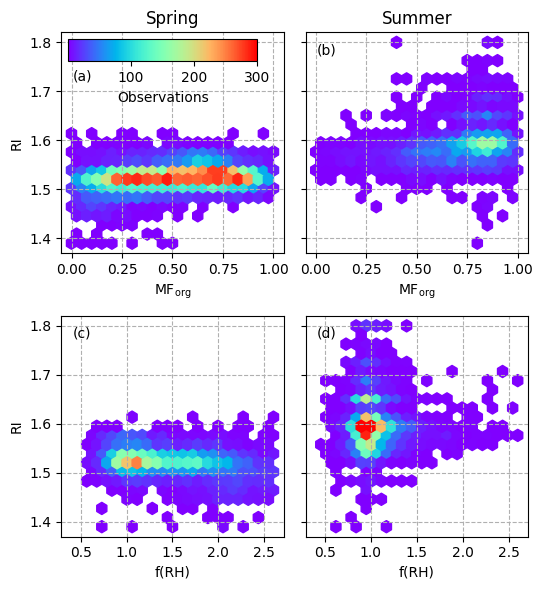

In [14]:
fig, axes = plt.subplots(2,2, sharex=False, sharey=True, figsize=(5.5,6))
ds = [d_sp, d_su]

for i in range(0,2):
    ax = axes[0,i]
    di = ds[i]
    di = di[(di['Org_AMS_STP']/di['tot']<1) & (di['Org_AMS_STP']/di['tot']>0)]
    hb = ax.hexbin(di['Org_AMS_STP']/di['tot'], di['RI'], gridsize=20, cmap='rainbow', mincnt=1, vmin=1, vmax=300, extent=[0, 1, d['RI'].min(), d['RI'].max()])
    ax.set_xlabel(r'MF$_{\rm org}$')
    ax.set_title(['Spring', 'Summer'][i])
    # Add grid lines
    ax.grid(True, linestyle='--', alpha=1)

for i in range(0,2):
    ax = axes[1,i]
    di = ds[i]
    #di = di[(di['Org_AMS_STP']/di['tot']<1) & (di['Org_AMS_STP']/di['tot']>0)]
    hb = ax.hexbin(di['fRH550_RH20to80'], di['RI'], gridsize=20, cmap='rainbow', mincnt=1, vmin=1, vmax=300, extent=[.4, 2.6, d['RI'].min(), d['RI'].max()])
    ax.set_xlabel(r'f(RH)')
    # Add grid lines
    ax.grid(True, linestyle='--', alpha=1)
cbaxes = inset_axes(axes[0,0], width="85%", height="10%", loc='upper left') 
cbar = plt.colorbar(hb, cax=cbaxes, label='Observations', location='top',pad=-.05)  # Add a colorbar for density
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')
axes[0,0].set_ylabel('RI')
axes[1,0].set_ylabel('RI')

ax = axes[0,0]
ax.text(0.05, 0.83, '(a)', transform=ax.transAxes, verticalalignment='top')
ax = axes[0,1]
ax.text(0.05, 0.95, '(b)', transform=ax.transAxes, verticalalignment='top')
ax = axes[1,0]
ax.text(0.05, 0.95, '(c)', transform=ax.transAxes, verticalalignment='top')
ax = axes[1,1]
ax.text(0.05, 0.95, '(d)', transform=ax.transAxes, verticalalignment='top')


fig.tight_layout()
fig.savefig('../figures/RI_MF_org_fRH_hexbin.png', dpi=600, bbox_inches='tight')

In [15]:
d.keys()

Index(['Time_Start', 'Time_Stop', 'Time_Mid', 'RH', 'Dp', 'RI', 'GF',
       'Org_AMS_STP', 'SO4_AMS_STP', 'NO3_AMS_STP', 'NH4_AMS_STP',
       'Chl_AMS_STP', 'mz42_AMS_STP', 'mz43_AMS_STP', 'mz44_AMS_STP',
       'mz55_AMS_STP', 'mz57_AMS_STP', 'mz58_AMS_STP', 'mz60_AMS_STP',
       'mz79_AMS_STP', 'mz91_AMS_STP', 'Sc450_total', 'Sc550_total',
       'Sc700_total', 'Sc450_submicron', 'Sc550_submicron', 'Sc700_submicron',
       'Sc550_submicron_amb', 'Abs470_total', 'Abs532_total', 'Abs660_total',
       'Ext532_submicron_dry', 'Ext532_submicron_amb', 'gamma550',
       'fRH550_RH20to80', 'AEscatDRY_450to700nm', 'AEscatAMB_450to700nm',
       'AEabsDRY_470to660nm', 'SSA_dry_450nm', 'SSA_dry_550nm',
       'SSA_dry_700nm', 'SSA_amb_550nm', 'stdPT', 'Latitude', 'Longitude',
       'GPS_Altitude', 'IR_Surf_Temp', 'Day_Of_Year', 'Pressure_Altitude',
       'Radar_Altitude', 'Ground_Speed', 'True_Air_Speed',
       'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading',
   

In [16]:
r1 = d[d.Time_Start.dt.date==pd.Timestamp('2024-05-28').date()]
r7 = d[d.Time_Start.dt.date==pd.Timestamp('2024-06-07').date()]

In [17]:
ds[0].Dp.unique()

array([ 225.,  200.,  160.,  170., 1000.,  180.,  250.,  300.,  350.,
        600.,  450.,  500.,  700.,  800.])

In [18]:
ds[1].Dp.unique()

array([ 200.,  180.,  350.,  250.,  600.,  450.,  500.,  700.,  800.,
       1000.])

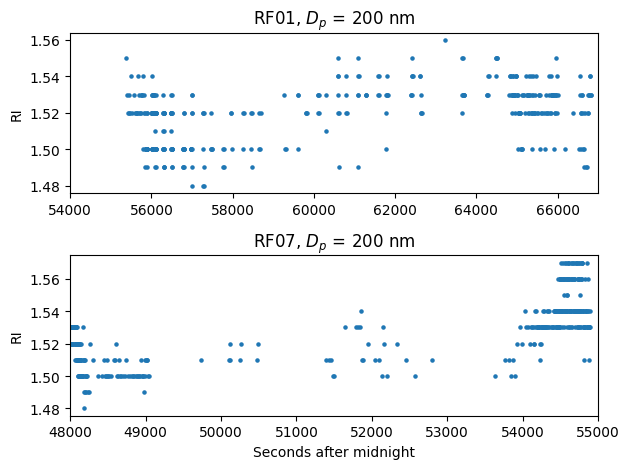

In [19]:
ds = [r1, r7]
lims = [[54000, 67000],[48000, 55000]]
fig, axes = plt.subplots(2)
for i in range(2):
    ax = axes[i]


    di = ds[i][ds[i].Dp==200].copy()

    # Convert Time_Mid to seconds after midnight
    di['s'] = (di.Time_Mid - di.Time_Mid.dt.normalize()).dt.total_seconds()
    di = di[(di['s'] > lims[i][0]) & (di['s'] < lims[i][1])]


    # Plot with seconds after midnight on the x-axis
    ax.scatter(di.s, di.RI, s=5)
    ax.set_xlim(lims[i])
    ax.set_ylabel('RI')
    ax.set_title(['RF01, $D_p$ = 200 nm', 'RF07, $D_p$ = 200 nm'][i])
axes[1].set_xlabel('Seconds after midnight')
fig.tight_layout()
fig.savefig('../figures/RI_case_study.png', dpi=300, bbox_inches='tight')

[ 200.  160.  170.  180.  250.  300.  350.  600. 1000.]
[200. 250. 180. 350.]


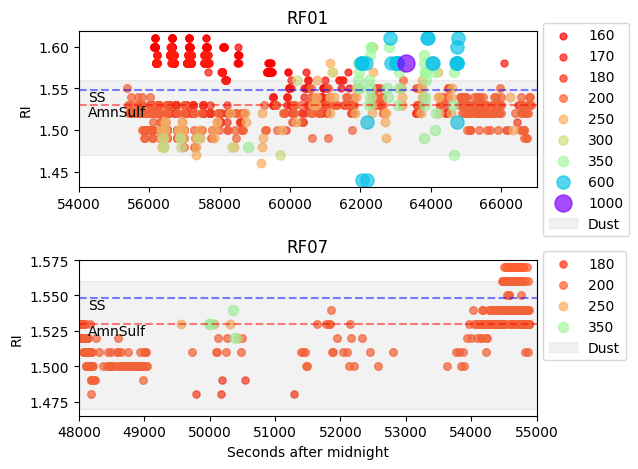

In [37]:
ds = [r1, r7]
lims = [[54000, 67000],[48000, 55000]]
fig, axes = plt.subplots(2)
for i in range(2):
    ax = axes[i]


    di = ds[i].copy()#ds[i][ds[i].Dp==200].copy()

    # Convert Time_Mid to seconds after midnight
    di['s'] = (di.Time_Mid - di.Time_Mid.dt.normalize()).dt.total_seconds()
    di = di[(di['s'] > lims[i][0]) & (di['s'] < lims[i][1])]

     # Create a colormap
    cmap = mpl.colormaps.get_cmap('rainbow_r')  # You can choose any colormap you like
    norm = LogNorm(vmin=160, vmax=1000)
    lab = ['SS', 'AmnSulf']
    ris = [1.5484, 1.530]
    cs = ['blue', 'red']
    samps = 2
    for j in range(samps):
        ax.text(x=(lims[i][1]-lims[i][0])*.02+lims[i][0], y=ris[j], s=lab[j], 
                va='top', ha='left')
        ax.axhline(ris[j], alpha=0.5, ls='--', color=cs[j])

    


    print(di['Dp'].unique())
    for dp in sorted(di['Dp'].unique()):
        dj = di[di.Dp==dp].copy()
        # Plot with seconds after midnight on the x-axis
        ax.scatter(dj.s, dj.RI, s=(dp/200)*2*15, color=cmap(norm(dp)), label = int(dp), alpha=0.7)

    d_ris = [1.47,1.56]
    # Shade the region between the two horizontal lines
    ax.fill_between(lims[i], 1.47,1.56, color='gray', alpha=.1, label='Dust')

    ax.set_xlim(lims[i])
    ax.set_ylabel('RI')
    ax.legend(bbox_to_anchor=(1, 1.1))
    ax.set_title(['RF01', 'RF07'][i])
axes[1].set_xlabel('Seconds after midnight')
fig.tight_layout()
fig.savefig('../figures/RI_case_study_all_dp.png', dpi=300, bbox_inches='tight')

In [33]:
dj.s

8346    49993.5
8347    50024.5
8357    50361.0
8358    50392.0
Name: s, dtype: float64

In [21]:
di['s']

8204    48002.0
8205    48004.0
8206    48007.0
8207    48010.5
8208    48013.5
         ...   
8602    54881.0
8603    54883.0
8604    54884.5
8605    54886.0
8606    54888.0
Name: s, Length: 403, dtype: float64

In [22]:
pd.to_datetime('2024-05-30')

Timestamp('2024-05-30 00:00:00')

In [23]:
d.Time_Start.dt.date

0        2024-05-24
1        2024-05-24
2        2024-05-24
3        2024-05-24
4        2024-05-24
            ...    
31676    2024-08-16
31677    2024-08-16
31678    2024-08-16
31679    2024-08-16
31680    2024-08-16
Name: Time_Start, Length: 31681, dtype: object